# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [259]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [260]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airbnb_listings.csv', index_col=0)

<ipython-input-260-5ec02b2b61ee>:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [261]:
# Q1
pd.options.display.max_columns = None
df.head(5)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [262]:
# Q2
df.isnull().sum()[df.isnull().sum()!=0].sort_values(ascending=False)

jurisdiction_names             50781
license                        50759
square_feet                    50407
monthly_price                  46119
weekly_price                   45411
host_response_rate             19006
host_response_time             19006
security_deposit               17325
host_acceptance_rate           14015
review_scores_value            11482
review_scores_location         11482
review_scores_checkin          11479
review_scores_accuracy         11466
review_scores_communication    11463
review_scores_cleanliness      11452
review_scores_rating           11431
reviews_per_month              10453
beds                             482
bedrooms                          77
bathrooms                         54
host_listings_count                5
host_total_listings_count          5
host_has_profile_pic               5
host_is_superhost                  5
host_identity_verified             5
dtype: int64

In [263]:
#Q2
(df.isnull().sum()[df.isnull().sum()!=0] / len(df) * 100).sort_values(ascending=False)

jurisdiction_names             99.970470
license                        99.927160
square_feet                    99.234192
monthly_price                  90.792582
weekly_price                   89.398772
host_response_rate             37.416332
host_response_time             37.416332
security_deposit               34.107016
host_acceptance_rate           27.590755
review_scores_value            22.604142
review_scores_location         22.604142
review_scores_checkin          22.598236
review_scores_accuracy         22.572644
review_scores_communication    22.566738
review_scores_cleanliness      22.545082
review_scores_rating           22.503740
reviews_per_month              20.578392
beds                            0.948894
bedrooms                        0.151587
bathrooms                       0.106308
host_listings_count             0.009843
host_total_listings_count       0.009843
host_has_profile_pic            0.009843
host_is_superhost               0.009843
host_identity_ve

- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

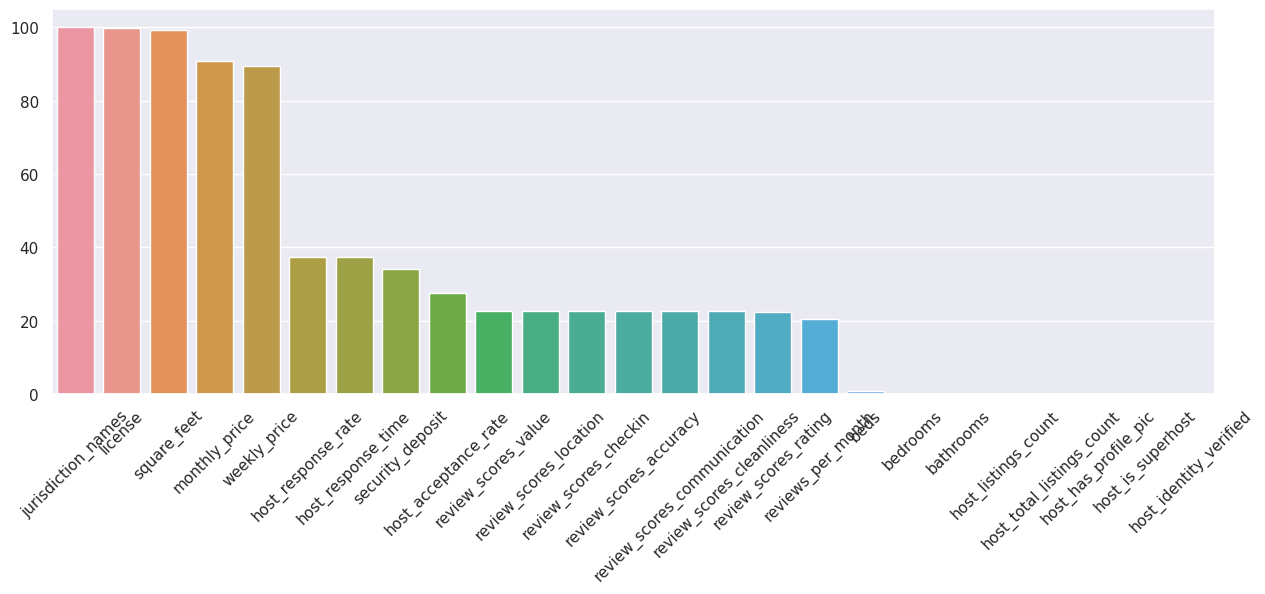

In [264]:
# Q3
missing_values = (df.isnull().sum()[df.isnull().sum()!=0] / len(df) * 100).sort_values(ascending=False)

sns.barplot(x = missing_values.index, y=missing_values)
plt.xticks(rotation=45)
plt.show()

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [265]:
# Q4
df[df['beds'].isnull()].head()


,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,Manhattan,40.70850,-74.01795,t,Apartment,Private room,2,NaN,1.0,NaN,Real Bed,{},NaN,150,$500.00,"$1,600.00",NaN,1,$0.00,1,1125,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.72152,-73.99279,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,1300,NaN,NaN,NaN,1,$0.00,1,1125,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Brooklyn,40.70528,-73.95756,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,190,NaN,NaN,$0.00,1,$100.00,1,218,t,30,60,90,365,1,0,NaN,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.77799,-73.95223,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,80,$700.00,"$3,000.00",NaN,1,$0.00,1,60,t,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Brooklyn,40.71099,-73.95217,t,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,{},NaN,48,NaN,NaN,NaN,1,$0.00,5,30,t,0,0,0,0,1,0,80.0,6.0,6.0,10.0,10.0,10.0,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [266]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [267]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

<Axes: xlabel='room_type', ylabel='count'>

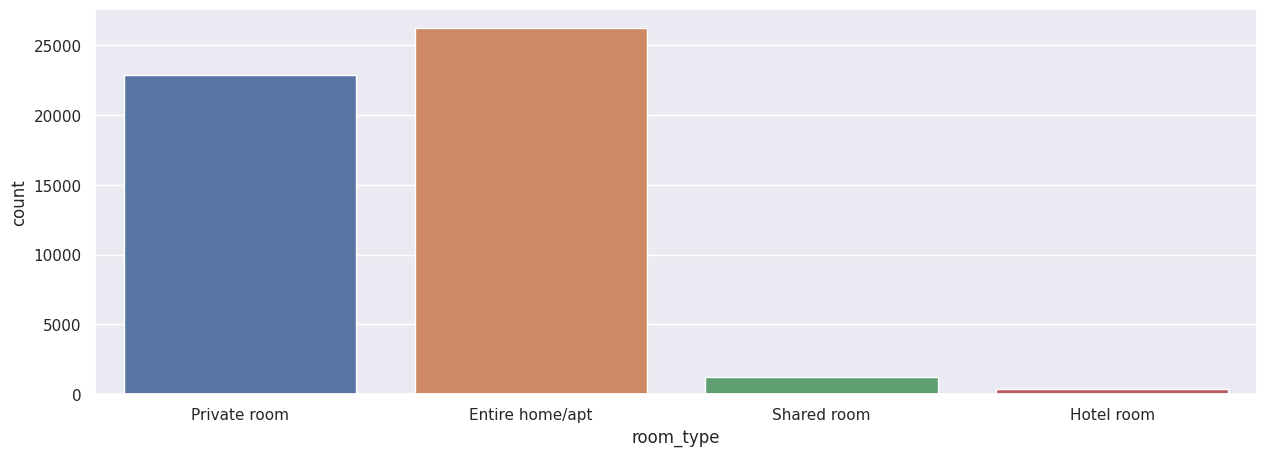

In [269]:
# Q5
sns.countplot(x = 'room_type',data=df)

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

<Axes: >

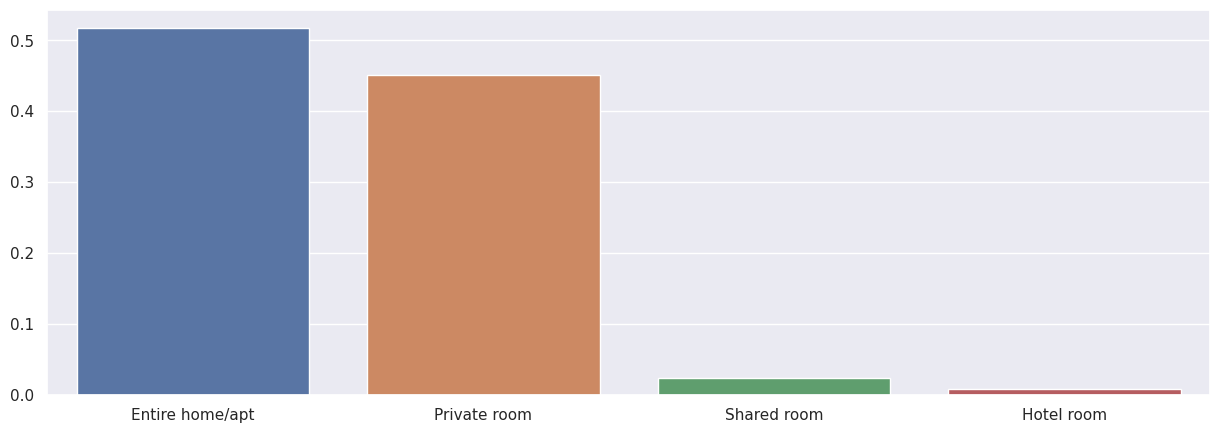

In [270]:
# Q6
rt_df = df['room_type'].value_counts()
sns.barplot(x=rt_df.index,y=rt_df.values/len(df))

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

<Axes: xlabel='neighborhood', ylabel='count'>

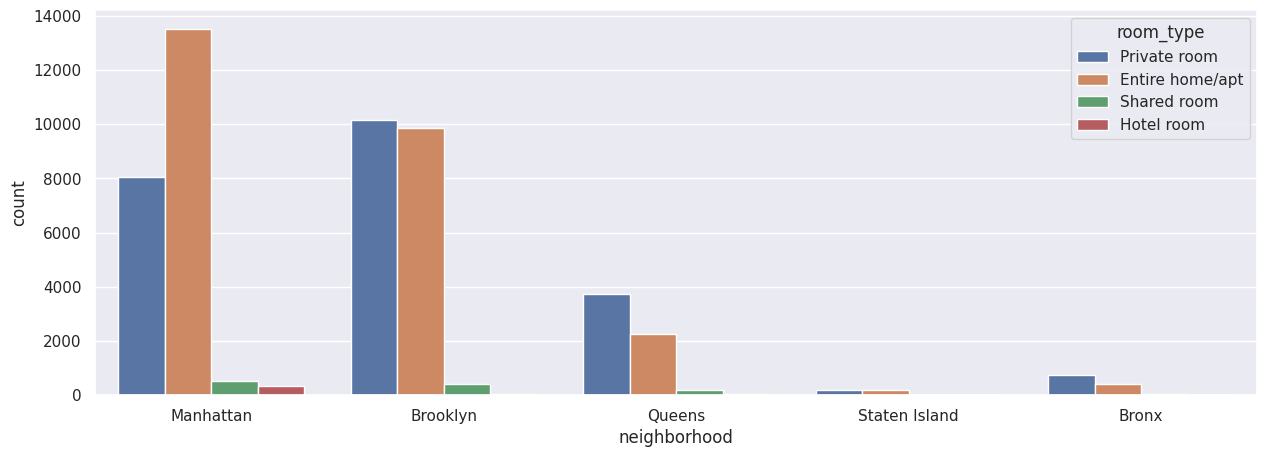

In [271]:
# Q7
sns.countplot(x='neighborhood',data=df,hue='room_type')

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

<Axes: xlabel='neighborhood', ylabel='price'>

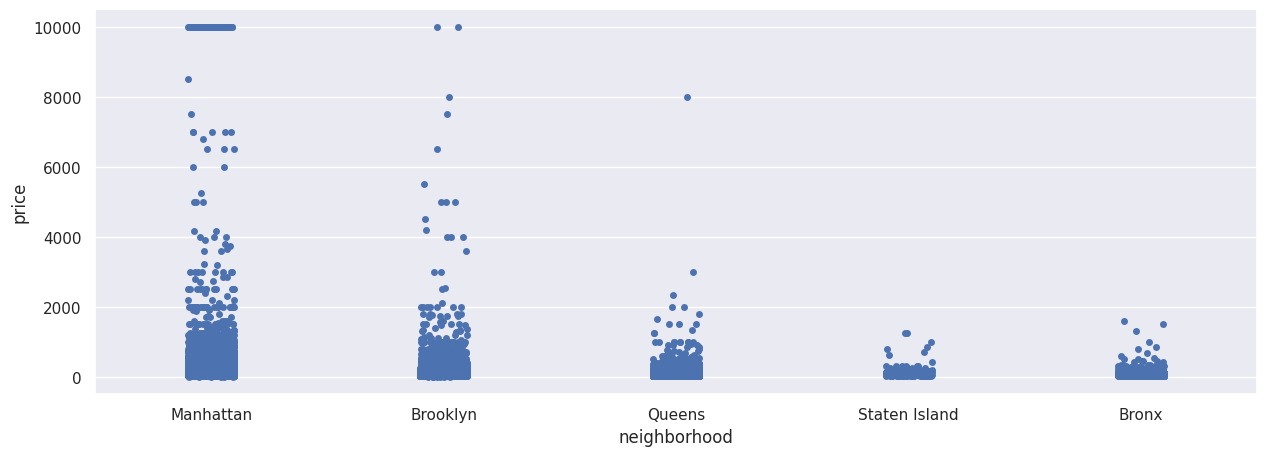

In [272]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
sns.stripplot(x='neighborhood',y='price',data=df)

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [273]:
# Q9

# Queens neighborhood에 outlier 값이 하나 있다.
# 맨해튼에 가격이 10000인 이상값들이 있으며, brooklyn에도 마찬가지로 이상치가 있다.
# 평균적으로 manhattan>brooklyn>queens>bronx>staten Island순으로 집값이 높다

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

(array([3.1006e+04, 5.5040e+03, 7.7540e+03, 2.0500e+03, 2.5020e+03,
        4.8500e+02, 7.5200e+02, 1.0700e+02, 2.5400e+02, 4.6000e+01,
        1.0800e+02, 2.0000e+01, 3.2000e+01, 1.7000e+01, 1.5600e+02,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 1.  ,  2.05,  3.1 ,  4.15,  5.2 ,  6.25,  7.3 ,  8.35,  9.4 ,
        10.45, 11.5 , 12.55, 13.6 , 14.65, 15.7 , 16.75, 17.8 , 18.85,
        19.9 , 20.95, 22.  ]),
 <BarContainer object of 20 artists>)

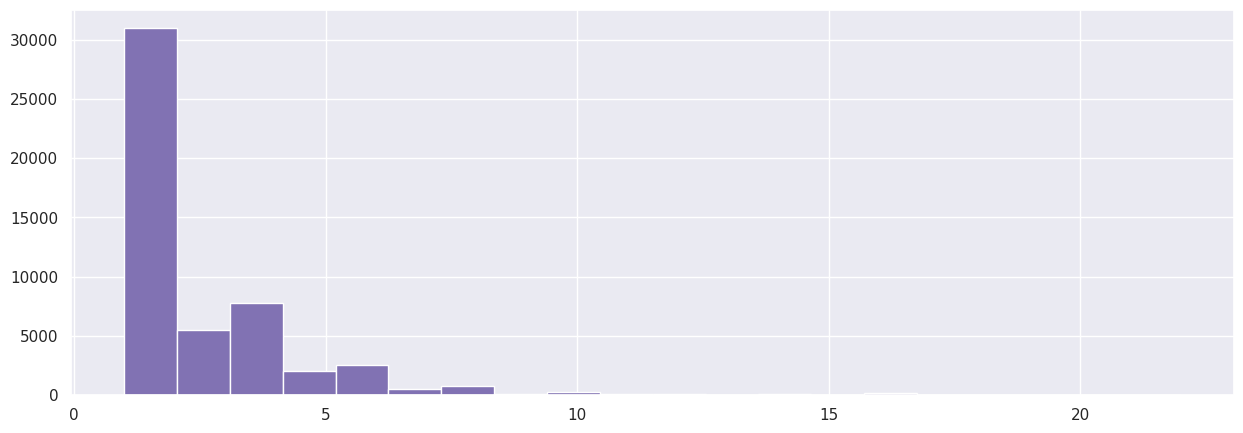

In [274]:
# Q10
plt.hist(df['accommodates'],color='m',bins=20)

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

(array([7.000e+01, 2.140e+03, 7.033e+03, 7.391e+03, 6.234e+03, 4.696e+03,
        4.233e+03, 4.108e+03, 2.502e+03, 2.265e+03, 2.035e+03, 1.131e+03,
        1.594e+03, 5.840e+02, 6.390e+02, 7.620e+02, 2.990e+02, 5.200e+02,
        1.780e+02, 2.420e+02, 2.770e+02, 1.050e+02, 2.050e+02, 5.500e+01,
        1.230e+02, 1.940e+02, 2.900e+01, 9.000e+01, 2.200e+01, 6.600e+01,
        7.900e+01, 8.000e+00, 4.900e+01, 1.300e+01, 3.300e+01, 3.800e+01,
        6.000e+00, 6.900e+01, 1.000e+01, 3.100e+01, 6.400e+01, 6.000e+00,
        2.400e+01, 4.000e+00, 1.300e+01, 2.400e+01, 4.000e+00, 1.100e+01,
        1.000e+01, 1.260e+02]),
 array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,
         180.,  200.,  220.,  240.,  260.,  280.,  300.,  320.,  340.,
         360.,  380.,  400.,  420.,  440.,  460.,  480.,  500.,  520.,
         540.,  560.,  580.,  600.,  620.,  640.,  660.,  680.,  700.,
         720.,  740.,  760.,  780.,  800.,  820.,  840.,  860.,  880.,
         900.,  920.,

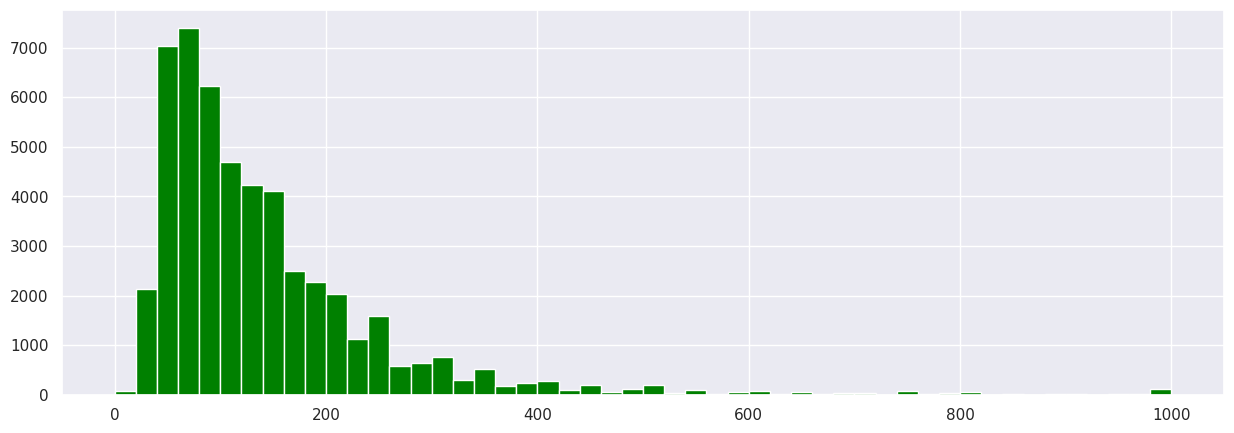

In [275]:
# Q11
plt.hist(df['price'],color='green',range=[0,1000],bins=50)

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [276]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airbnb_listings.csv', index_col=0)

<ipython-input-276-5ec02b2b61ee>:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airbnb_listings.csv', index_col=0)


In [277]:
df

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.857220,-73.937900,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.753620,-73.983770,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.685140,-73.959760,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.747670,-73.975000,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.719100,-73.990400,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50791,42890680,within an hour,100%,100%,f,5.0,5.0,"['email', 'phone', 'offline_government_id', 's...",t,f,Manhattan,40.814840,-73.946340,f,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",NaN,150,NaN,NaN,$0.00,1,$0.00,5,1125,t,25,55,85,271,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,t,f,flexible,f,f,NaN
50792,42890730,within an hour,100%,99%,f,21.0,21.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.769807,-73.987225,t,Apartment,Entire home/apt,2,1.0,0.0,0.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",NaN,149,NaN,NaN,NaN,1,$0.00,2,5,t,23,53,83,83,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,t,f,flexible,f,f,NaN
50793,42891018,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,Manhattan,40.736252,-74.002622,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Pets allowed...",NaN,188,NaN,NaN,NaN,1,$0.00,3,30,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,t,f,flexible,f,f,NaN
50794,42891637,NaN,NaN,100%,f,2.0,2.0,"['email', 'phone', 'offline_government_id', 'g...",t,f,Brooklyn,40.663870,-73.953400,t,A

- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [278]:
#Q12
for col in df.columns:

  if df[col].isnull().sum()/len(df)>=0.25:
    df.drop(columns = [col],inplace=True)

  elif df[col].isnull().sum()/len(df)>=0.1:
    df.drop(columns=[col],inplace=True,axis=0)

  else:
    try: #수치형 변수
      df[col] = df[col].fillna(df[col].median())
    except: # 범주형 변수
      vc = df[col].value_counts(ascending=False)
      idx = len(vc)//2 -1
      df[col] = df[col].fillna((vc.index[idx]))

In [279]:
df

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,2060,f,0.0,0.0,['reviews'],t,f,Manhattan,40.857220,-73.937900,t,Other,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi}",100,1,$0.00,1,730,t,30,60,90,365,1,0,f,f,f,flexible,f,f
1,2595,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.753620,-73.983770,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",225,1,$0.00,7,1125,t,4,34,64,339,48,5,f,f,f,strict_14_with_grace_period,t,t
2,3831,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.685140,-73.959760,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",89,1,$0.00,1,730,t,6,10,13,151,313,69,f,f,f,moderate,f,f
3,5099,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.747670,-73.975000,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200,2,$100.00,3,21,t,0,0,0,0,78,8,f,f,f,moderate,t,t
4,5114,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.719100,-73.990400,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",94,1,$13.00,1,730,t,30,60,90,109,75,0,f,f,f,strict_14_with_grace_period,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50791,42890680,f,5.0,5.0,"['email', 'phone', 'offline_government_id', 's...",t,f,Manhattan,40.814840,-73.946340,f,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",150,1,$0.00,5,1125,t,25,55,85,271,0,0,f,t,f,flexible,f,f
50792,42890730,f,21.0,21.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.769807,-73.987225,t,Apartment,Entire home/apt,2,1.0,0.0,0.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",149,1,$0.00,2,5,t,23,53,83,83,0,0,f,t,f,flexible,f,f
50793,42891018,f,1.0,1.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,Manhattan,40.736252,-74.002622,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Pets allowed...",188,1,$0.00,3,30,t,30,60,90,365,0,0,f,t,f,flexible,f,f
50794,42891637,f,2.0,2.0,"['email', 'phone', 'offline_government_id', 'g...",t,f,Brooklyn,40.663870,-73.953400,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",1100,1,$0.00,1,1125,t,23,28,29,29,0,0,f,f,f,flexible,f,f


- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [280]:
#Q13-1)

(df['host_listings_count']==df['host_total_listings_count']).sum() # 두 열의 값을 비교, True 값이 50796개로 두 열이 동일함을 알 수 있다.
df.drop(columns ='host_total_listings_count',inplace=True)
df

# host_listings_count열과 host_total_listings_count 열을 비교해보았을 때 두 열의 값이 동일했다.
# 따라서 drop 메서드를 이용해 둘 중 하나의 열(host_total_listings_count)을 삭제했다.

,id,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,2060,f,0.0,['reviews'],t,f,Manhattan,40.857220,-73.937900,t,Other,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi}",100,1,$0.00,1,730,t,30,60,90,365,1,0,f,f,f,flexible,f,f
1,2595,f,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.753620,-73.983770,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",225,1,$0.00,7,1125,t,4,34,64,339,48,5,f,f,f,strict_14_with_grace_period,t,t
2,3831,f,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.685140,-73.959760,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",89,1,$0.00,1,730,t,6,10,13,151,313,69,f,f,f,moderate,f,f
3,5099,f,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.747670,-73.975000,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200,2,$100.00,3,21,t,0,0,0,0,78,8,f,f,f,moderate,t,t
4,5114,f,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.719100,-73.990400,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",94,1,$13.00,1,730,t,30,60,90,109,75,0,f,f,f,strict_14_with_grace_period,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50791,42890680,f,5.0,"['email', 'phone', 'offline_government_id', 's...",t,f,Manhattan,40.814840,-73.946340,f,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",150,1,$0.00,5,1125,t,25,55,85,271,0,0,f,t,f,flexible,f,f
50792,42890730,f,21.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.769807,-73.987225,t,Apartment,Entire home/apt,2,1.0,0.0,0.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",149,1,$0.00,2,5,t,23,53,83,83,0,0,f,t,f,flexible,f,f
50793,42891018,f,1.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,Manhattan,40.736252,-74.002622,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Pets allowed...",188,1,$0.00,3,30,t,30,60,90,365,0,0,f,t,f,flexible,f,f
50794,42891637,f,2.0,"['email', 'phone', 'offline_government_id', 'g...",t,f,Brooklyn,40.663870,-73.953400,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",1100,1,$0.00,1,1125,t,23,28,29,29,0,0,f,f,f,flexible,f,f


In [281]:
#Q13-2)
new_host_ver = []

for row in df['host_verifications'].values:
  a = eval(row)
  new_host_ver.append(a)

df['host_verifications'] = new_host_ver
df['host_verifications'] = df['host_verifications'].str.len()

# host verification 열의 항목을 리스트 길이로 대체했다.(verification 항목 개수가 많을 수록 신뢰도가 높다고 판단)
# 수치형 데이터로 변환해야 분류 모델이 활용할 수 있기 때문. 해당 열 외에 다른 범주형 데이터도 모델을 돌리기 위해서는 바꿔주어야 한다.

In [282]:
df

,id,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,2060,f,0.0,1.0,t,f,Manhattan,40.857220,-73.937900,t,Other,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi}",100,1,$0.00,1,730,t,30,60,90,365,1,0,f,f,f,flexible,f,f
1,2595,f,6.0,9.0,t,t,Manhattan,40.753620,-73.983770,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",225,1,$0.00,7,1125,t,4,34,64,339,48,5,f,f,f,strict_14_with_grace_period,t,t
2,3831,f,1.0,4.0,t,t,Brooklyn,40.685140,-73.959760,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",89,1,$0.00,1,730,t,6,10,13,151,313,69,f,f,f,moderate,f,f
3,5099,f,1.0,5.0,t,f,Manhattan,40.747670,-73.975000,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200,2,$100.00,3,21,t,0,0,0,0,78,8,f,f,f,moderate,t,t
4,5114,f,3.0,3.0,t,f,Manhattan,40.719100,-73.990400,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",94,1,$13.00,1,730,t,30,60,90,109,75,0,f,f,f,strict_14_with_grace_period,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50791,42890680,f,5.0,6.0,t,f,Manhattan,40.814840,-73.946340,f,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",150,1,$0.00,5,1125,t,25,55,85,271,0,0,f,t,f,flexible,f,f
50792,42890730,f,21.0,5.0,t,t,Manhattan,40.769807,-73.987225,t,Apartment,Entire home/apt,2,1.0,0.0,0.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",149,1,$0.00,2,5,t,23,53,83,83,0,0,f,t,f,flexible,f,f
50793,42891018,f,1.0,7.0,t,f,Manhattan,40.736252,-74.002622,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Pets allowed...",188,1,$0.00,3,30,t,30,60,90,365,0,0,f,t,f,flexible,f,f
50794,42891637,f,2.0,4.0,t,f,Brooklyn,40.663870,-73.953400,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",1100,1,$0.00,1,1125,t,23,28,29,29,0,0,f,f,f,flexible,f,f


In [284]:
#Q13-3)
drop_columns = ['host_has_profile_pic','latitude','longitude','minimum_nights','maximum_nights',
                'requires_license','instant_bookable','is_business_travel_ready','require_guest_profile_picture',
                'require_guest_phone_verification']
df.drop(columns=drop_columns,inplace=True)
df
# 가격에 상대적으로 영향을 덜 미치는 feature를 제거했다.
# 사용자의 프로필사진 등록 여부, 호스트의 프로필 등록여부, 숙박 가능한 최대/최소 일수, 현재 예약이 가능한지 여부 (남은 방이 존재하므로)

,id,host_is_superhost,host_listings_count,host_verifications,host_identity_verified,neighborhood,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,cancellation_policy
0,2060,f,0.0,1.0,f,Manhattan,t,Other,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi}",100,1,$0.00,t,30,60,90,365,1,0,flexible
1,2595,f,6.0,9.0,t,Manhattan,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",225,1,$0.00,t,4,34,64,339,48,5,strict_14_with_grace_period
2,3831,f,1.0,4.0,t,Brooklyn,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",89,1,$0.00,t,6,10,13,151,313,69,moderate
3,5099,f,1.0,5.0,f,Manhattan,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200,2,$100.00,t,0,0,0,0,78,8,moderate
4,5114,f,3.0,3.0,f,Manhattan,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",94,1,$13.00,t,30,60,90,109,75,0,strict_14_with_grace_period
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50791,42890680,f,5.0,6.0,f,Manhattan,f,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",150,1,$0.00,t,25,55,85,271,0,0,flexible
50792,42890730,f,21.0,5.0,t,Manhattan,t,Apartment,Entire home/apt,2,1.0,0.0,0.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",149,1,$0.00,t,23,53,83,83,0,0,flexible
50793,42891018,f,1.0,7.0,f,Manhattan,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Pets allowed...",188,1,$0.00,t,30,60,90,365,0,0,flexible
50794,42891637,f,2.0,4.0,f,Brooklyn,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",1100,1,$0.00,t,23,28,29,29,0,0,flexible


---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가

</font>

* Q3 hint


<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
